<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/practicasregresionlasso_ridge_prac_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica_26 Regresión Lasso y Ridge

Alumno: Ramon Humberto Delgado Andrade

Matrícula: 263165

Profesor: Vicente García Jiménez

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---







#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  


In [13]:
#for google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Cargar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#load dataframe local
#df = pd.read_csv("insurance.csv")
#load dataframe google
df = pd.read_csv("/content/drive/MyDrive/ClassFiles/insurance.csv")

print(df)
print('='*80)
print(df.info())
print('='*80)
print(df.describe())


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    


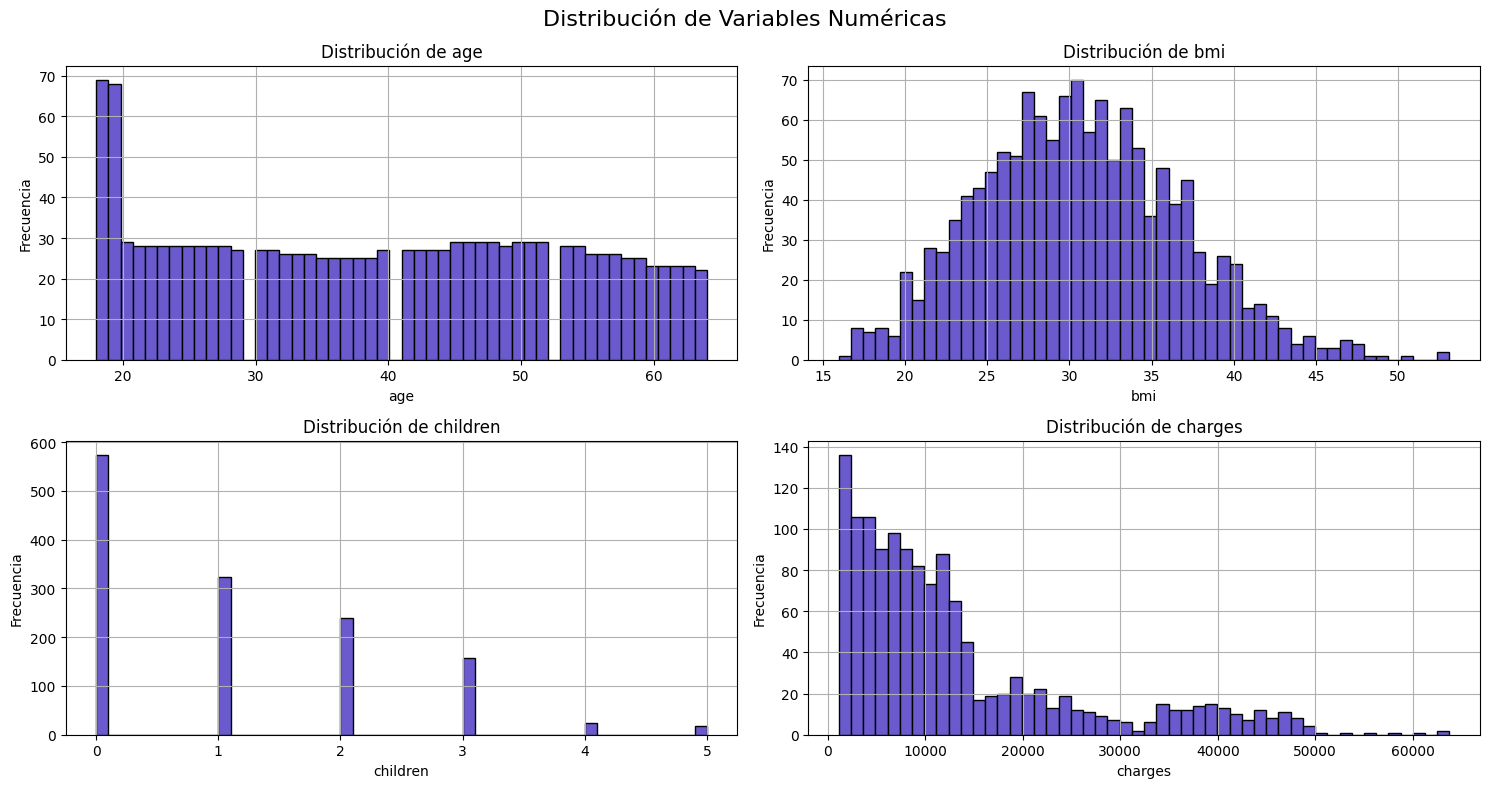

In [15]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Calcular el número de filas y columnas para el subplot
n = len(columnas_numericas)
ncols = 2
nrows = math.ceil(n/ncols)
# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    df[col].hist(ax=ax, bins=50, edgecolor='black',color='slateblue')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

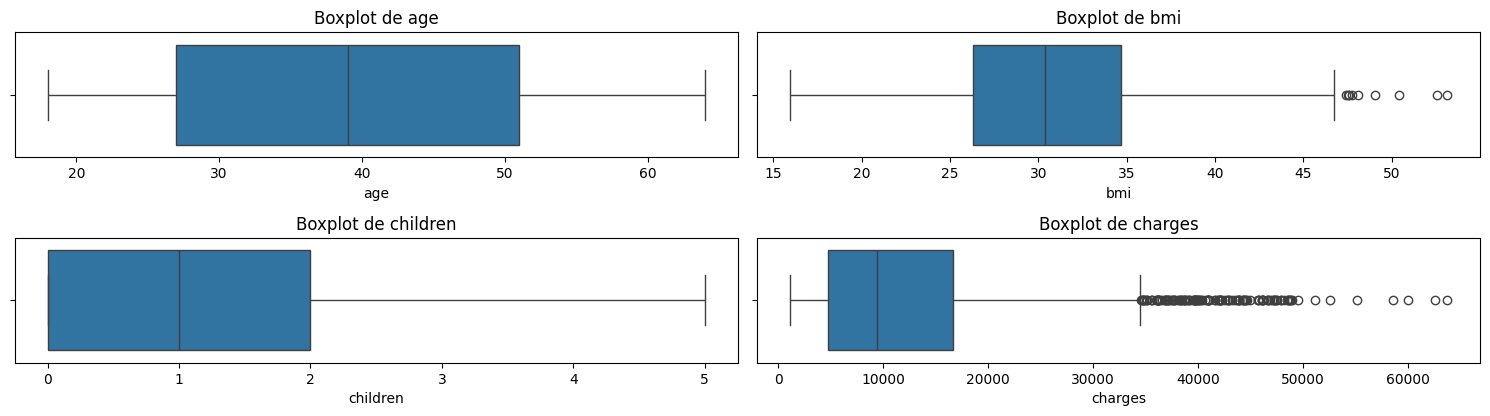

In [16]:
#boxplots
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada columna numérica
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(5, 2, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [17]:
#describe data
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


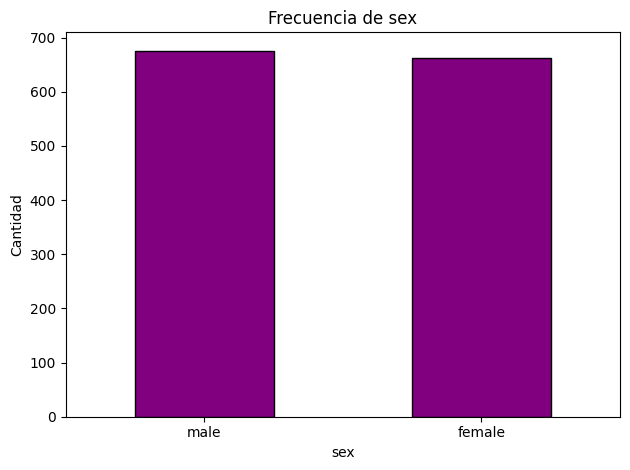

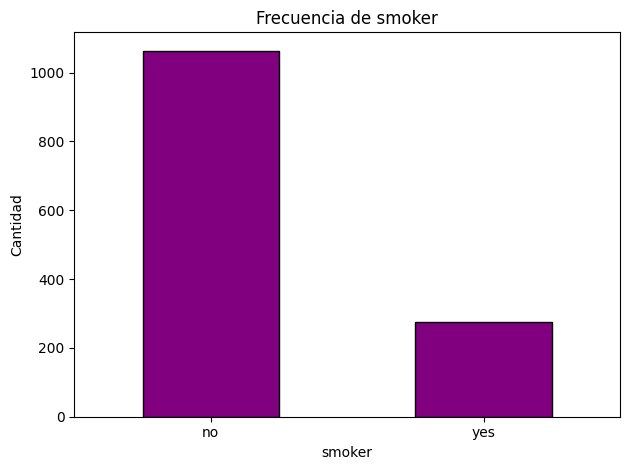

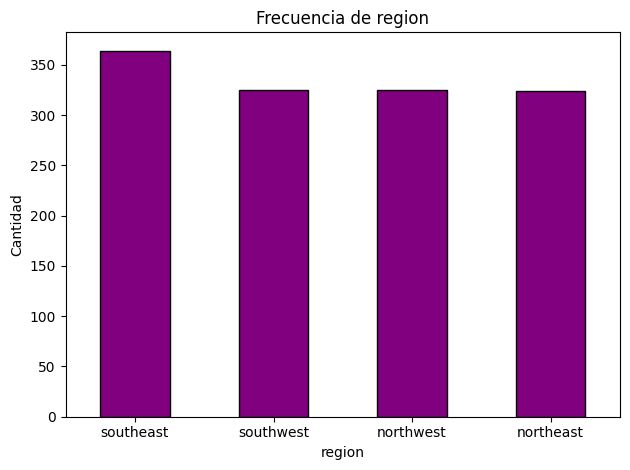

In [18]:
#plot category values

col_categoric = ['sex', 'smoker', 'region']

# Crear histogramas para cada variable numérica
for i, col in enumerate(col_categoric):
    frec = df[col].value_counts()
    frec.plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Frecuencia de ' + col)
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()




#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  


Matriz de correlación:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


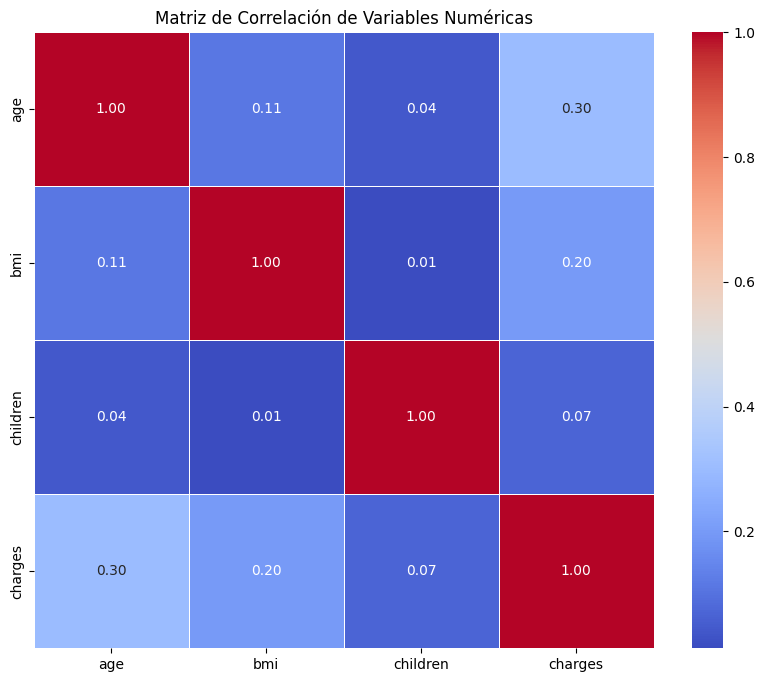

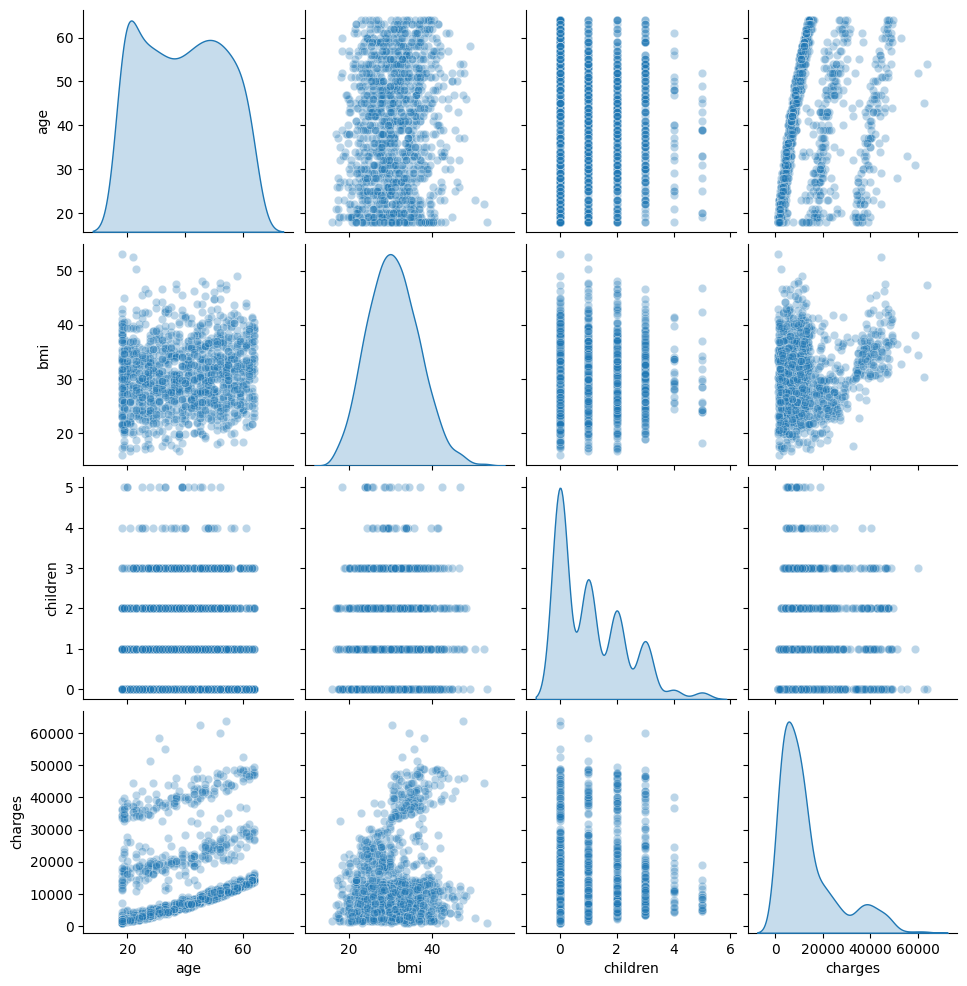

In [19]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(numeric_columns, plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

* Las variables que mas estan relacionadas al target 'charges' son 'age' y 'bmi'.

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  (no hay valores faltantes)
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  


In [20]:
#encoder
#crear el tipo de encoder

print(df[['sex', 'smoker', 'region']].head())

col_categoric = ['sex', 'smoker', 'region']
encoded_final = pd.DataFrame()

# Crear histogramas para cada variable numérica
for i, col in enumerate(col_categoric):
    encoder = OneHotEncoder(sparse_output=False,drop='first')

    #get an array of data encoded
    encoded_data = encoder.fit_transform(df[[col]])

    #transform the array into a pandas dataframe with the encoded names using the location column name and the values
    encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([col]))

    encoded_final = pd.concat([encoded_final,encoded_df], axis = 1)

print(encoded_final.head())

      sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest
   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0       0.0         1.0               0.0               0.0               1.0
1       1.0         0.0               0.0               1.0               0.0
2       1.0         0.0               0.0               1.0               0.0
3       1.0         0.0               1.0               0.0               0.0
4       1.0         0.0               1.0               0.0               0.0


In [21]:
from sklearn.preprocessing import StandardScaler
numeric_columns = df.iloc[:,:7].select_dtypes(include=[np.number])

print(numeric_columns.describe())
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
df_scaled = scaler.fit_transform(numeric_columns)

# Convertir el resultado a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns.columns)

print(df_scaled)
print(df_scaled.describe().round(3))

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
           age       bmi  children   charges
0    -1.438764 -0.453320 -0.908614  0.298584
1    -1.509965  0.509621 -0.078767 -0.953689
2    -0.797954  0.383307  1.580926 -0.728675
3    -0.441948 -1.305531 -0.908614  0.719843
4    -0.513149 -0.292556 -0.908614 -0.776802
...        ...       ...       ...       ...
1333  0.768473  0.050297  1.580926 -0.220551
1334 -1.509965  0.206139 -0.908614 -0.914002
1335 -1.509965  1.014878 -0.908614 -0.961596
1336 -1.296362 -0.7

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  




##### Modelo Lasso

In [22]:
# Seleccionar las características relevantes para el modelo
features = ["age", "sex", "bmi", "children", "smoker", "region"]
target = "charges"
df_copy = df[features + [target]].copy()

# Separar las características en numéricas y categóricas
categorical_features = ["sex", "smoker", "region"]
numeric_features = ["age", "bmi", "children"]

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),  # Normaliza las variables numéricas
    ("cat", OneHotEncoder(drop='first'), categorical_features)  # Convierte categóricas a variables dummy
])


In [23]:
# Definir el parámetro de regularización (alpha)
# Se puede ajustar con validación cruzada para optimizar el rendimiento
alpha = 0.1  # Controla la penalización sobre los coeficientes

# Crear un pipeline que primero preprocesa los datos y luego aplica regresión Lasso
lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=alpha))
])

In [24]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_copy[features]
y = df_copy[target]

# Entrenar el modelo Lasso con los datos
lasso.fit(X, y)

# Obtener los coeficientes después del ajuste
feature_names = numeric_features + list(lasso.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(lasso.named_steps["lasso"].coef_, index=feature_names)
print(coef)

age                  3607.401538
bmi                  2067.477362
children              572.886518
sex_male             -130.858174
smoker_yes          23847.874359
region_northwest     -351.296712
region_southeast    -1033.232029
region_southwest     -958.345589
dtype: float64


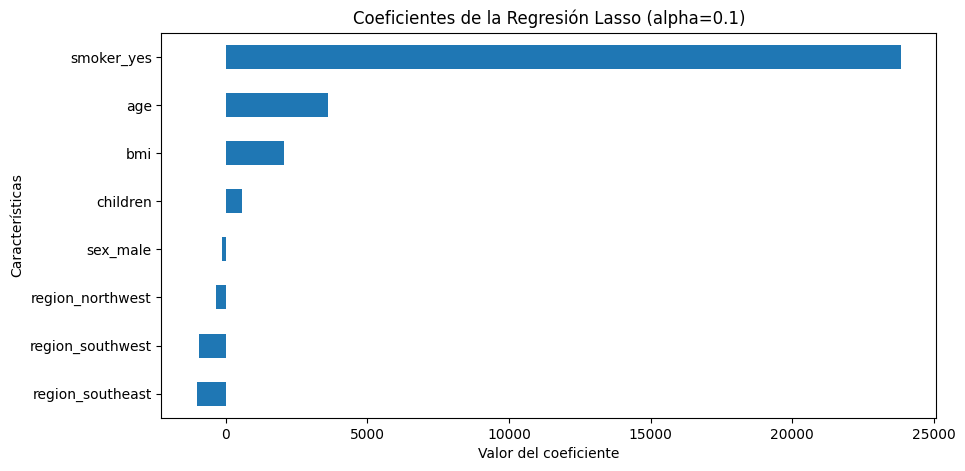

In [25]:
# Graficar los coeficientes de la regresión Lasso
plt.figure(figsize=(10, 5))
coef.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Lasso (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.show()

2. Calcular **MSE** y **R²** para evaluar rendimiento.  

In [26]:
# Evaluación del modelo con métricas de desempeño
y_pred = lasso.predict(X)
MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lasso:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Lasso:
MSE: 36501893.68
RMSE: 6041.68
MAE: 4170.90
R^2: 0.7509
Número de coeficientes no nulos: 8


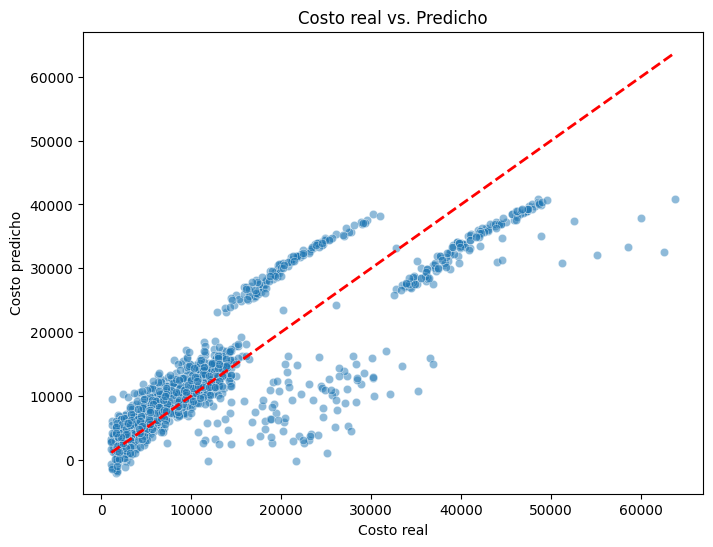

In [27]:
# Gráfico de dispersión: Precio real vs. Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Costo real")
plt.ylabel("Costo predicho")
plt.title("Costo real vs. Predicho")
plt.show()

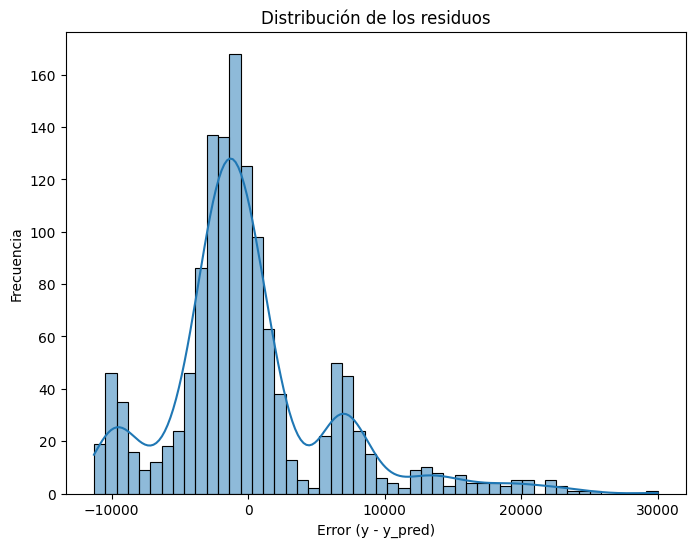

In [28]:
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

##### Prueba de normalidad

In [29]:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

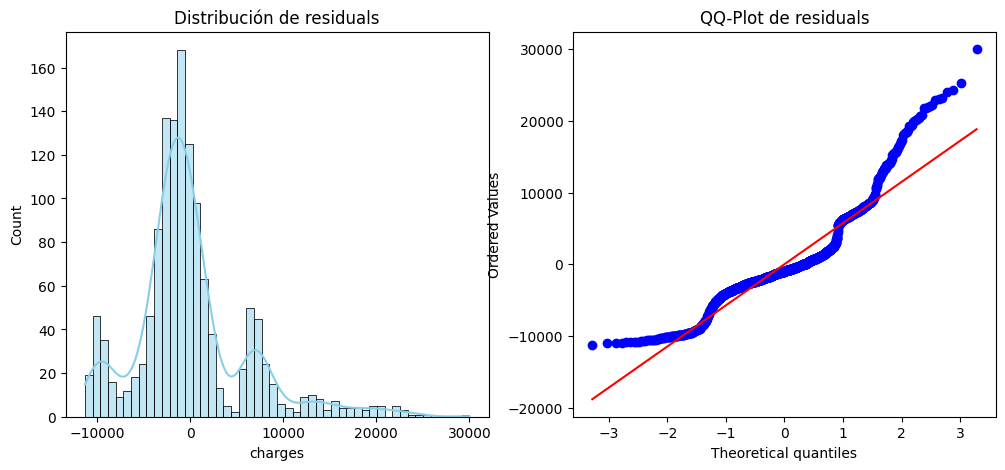


Pruebas de normalidad para la columna: residuals
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 44.87138
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [30]:
plot_distribution(residuals, 'residuals')
normality_tests(residuals, 'residuals')

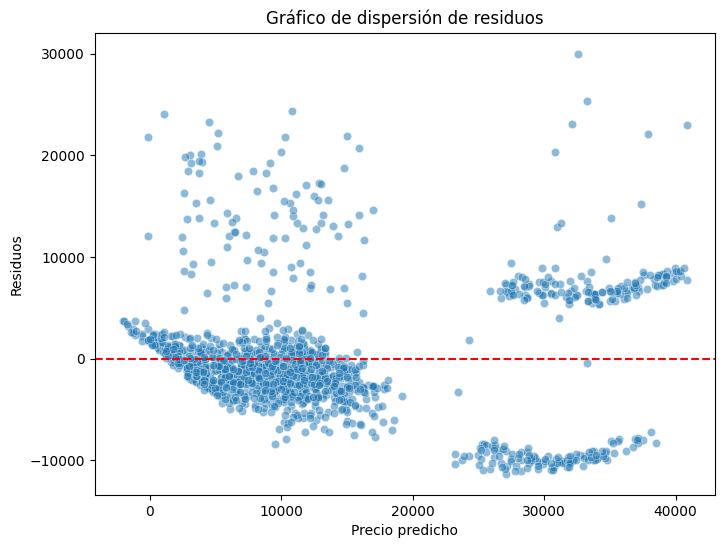

In [31]:
# Gráfico de dispersión de residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos")
plt.show()

3. Analizar los coeficientes para identificar variables importantes.

La variable más importante es la variable categórica Smoker, donde, usando los coeficientes, se le da el peso más grande en la influencia del costo para el asegurado.

De ahí siguen age y BMI, que son la segunda y tercera variables con mayor peso.

Que la variable categórica 'Smoker' tenga un peso alto para el costo del seguro tiene sentido, ya que es un factor que implica directamente a la persona asegurada. Las aseguradoras deben dar un peso mayor a ese factor para establecer una tarifa para el seguro.

##### Modelo Ridge

In [32]:
# Definir un valor fijo de alpha
alpha = 1.0  # Se puede ajustar manualmente según necesidad

# Crear un pipeline con Ridge
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=alpha))
])

# Entrenar el modelo Ridge
ridge.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('ridge', Ridge())])

In [33]:
# Obtener los coeficientes después del ajuste
feature_names = numeric_features + list(ridge.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(ridge.named_steps["ridge"].coef_, index=feature_names)
print(coef)

age                  3604.096982
bmi                  2064.858647
children              573.073125
sex_male             -124.200613
smoker_yes          23737.991359
region_northwest     -347.825073
region_southeast    -1018.540799
region_southwest     -952.384021
dtype: float64


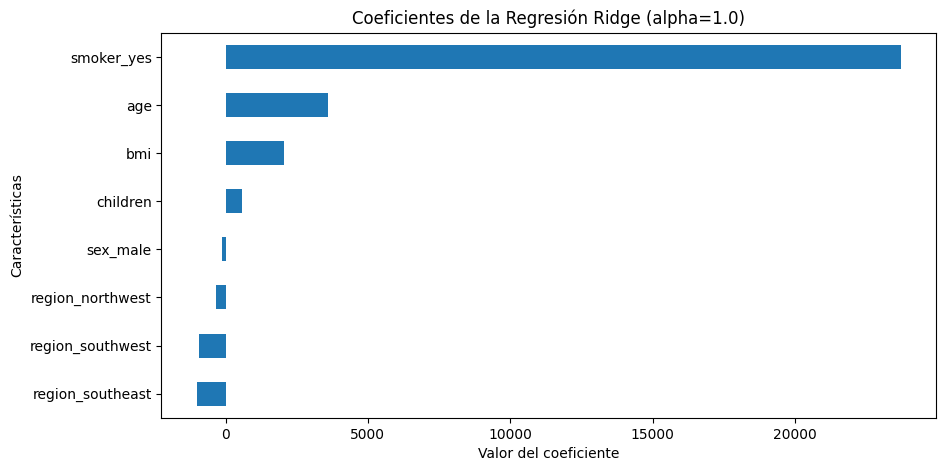

In [34]:
# Graficar los coeficientes de la regresión Ridge
plt.figure(figsize=(10, 5))
coef.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Ridge (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.show()

In [35]:
# Evaluación del modelo con métricas de desempeño
y_pred = ridge.predict(X)

MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Ridge:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Ridge:
MSE: 36503887.63
RMSE: 6041.84
MAE: 4178.37
R^2: 0.7509
Número de coeficientes no nulos: 8


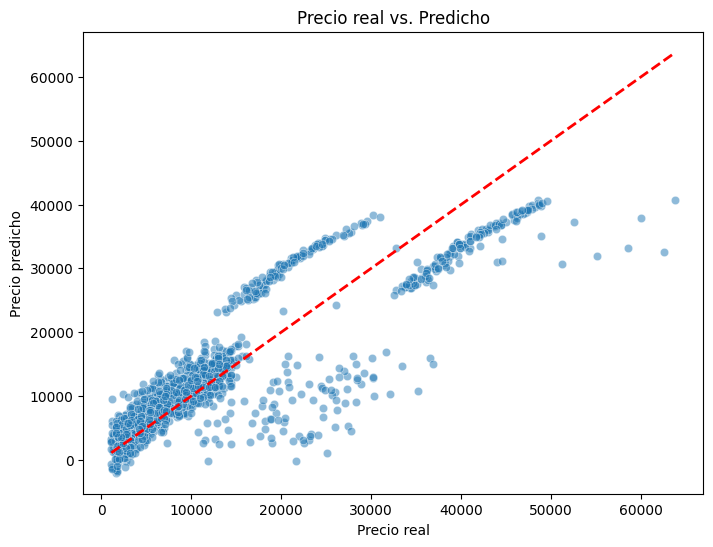

In [36]:
# Gráfico de dispersión: Precio real vs. Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs. Predicho")
plt.show()

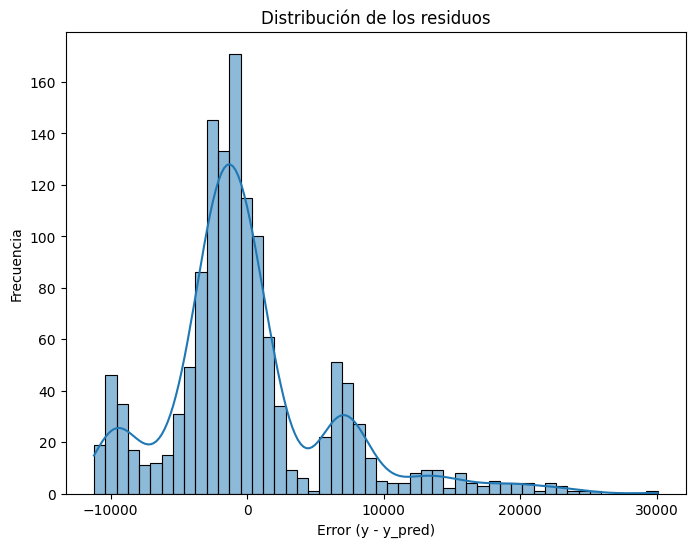

In [37]:
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

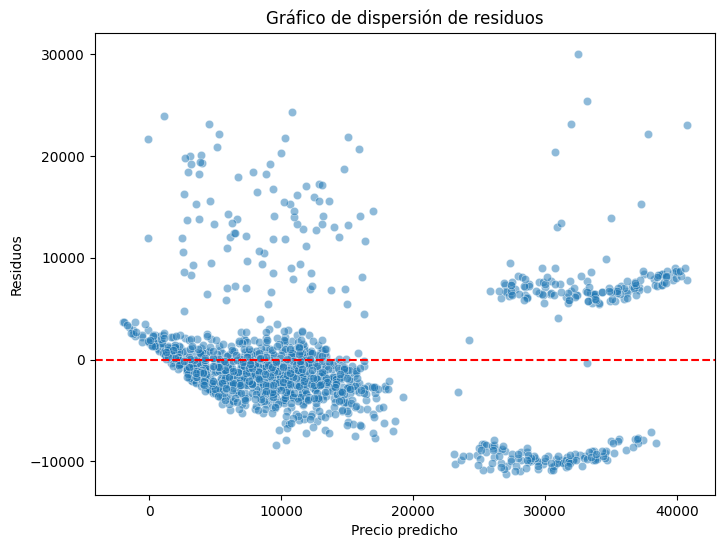

In [38]:
# Gráfico de dispersión de residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos")
plt.show()

In [39]:
##### Prueba de normalidad residuals

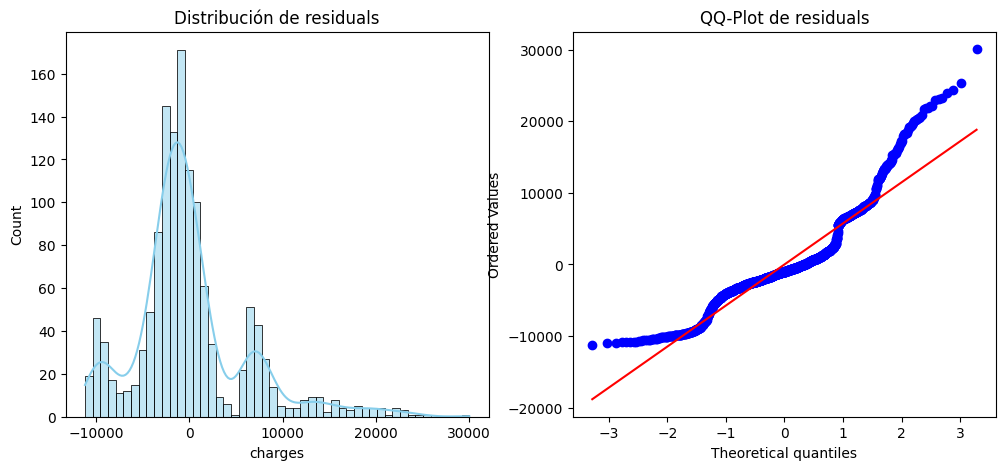


Pruebas de normalidad para la columna: residuals
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 45.40771
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [40]:
plot_distribution(residuals, 'residuals')
normality_tests(residuals, 'residuals')

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?

    Los dos modelos obtuvieron un valor R² practicamente iguales.

- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?

    En Lasso y Ridge se obtiene un valor muy cercano a cero para el coeficiente de 'Sex', esto debe de ser a que dentro de los datos originales no existe mucha relacion entre el Sexo de la persona asegurada y el costo del seguro.